In [1]:
import pandas as pd
import logging

# Log fayl manzili
log_path = r"C:\Users\Rasulbek907\Desktop\LifeSpan_Peoples\Log\data_loader.log"

# Log sozlamalari
logging.basicConfig(
    filename=log_path,
    filemode='a',  # Append mode
    format='%(asctime)s - %(levelname)s - %(message)s',
    level=logging.INFO
)

try:
    logging.info("CSV fayl o'qilmoqda:...")
    df = pd.read_csv(r"C:\Users\Rasulbek907\Desktop\LifeSpan_Peoples\Data\Feature_selection\Filtered_Features.csv")
    logging.info(f"Fayl muvaffaqiyatli o'qildi. Satırlar soni: {len(df)} ustunlar soni: {len(df.columns)}")
except Exception as e:
    logging.error(f"CSV faylni o'qishda xatolik: {e}")

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2022 entries, 0 to 2021
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          2022 non-null   int64  
 1   Unnamed: 0.2        2022 non-null   int64  
 2   name                2022 non-null   float64
 3   birth_date          2022 non-null   float64
 4   birth_place         2022 non-null   float64
 5   death_date          2022 non-null   float64
 6   death_place         2022 non-null   float64
 7   occupation          2022 non-null   float64
 8   awards              2022 non-null   float64
 9   alma_mater          2022 non-null   float64
 10  education           2022 non-null   float64
 11  spouse              2022 non-null   float64
 12  children            2022 non-null   float64
 13  occupation_cluster  2022 non-null   float64
 14  birth_year          2022 non-null   float64
 15  death_year          2022 non-null   float64
 16  life_s

In [4]:
!pip install shap

  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.62.1-cp313-cp313-win_amd64.whl.metadata (2.9 kB)
  Using cached cloudpickle-3.1.2-py3-none-any.whl.metadata (7.1 kB)
  Using cached llvmlite-0.45.1-cp313-cp313-win_amd64.whl.metadata (5.0 kB)
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 0.0/549.1 kB ? eta -:--:--
   ---------------------------------------- 549.1/549.1 kB 2.5 MB/s  0:00:00
Using cached slicer-0.0.8-py3-none-any.whl (15 kB)
Using cached numba-0.62.1-cp313-cp313-win_amd64.whl (2.7 MB)
Using cached llvmlite-0.45.1-cp313-cp313-win_amd64.whl (38.1 MB)
Using cached cloudpickle-3.1.2-py3-none-any.whl (22 kB)

   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [llvmlite]
   -------- ------------------------------- 1/5 [llvmlite]
   -------- ---------------------


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


# --- SHAP explanation ---

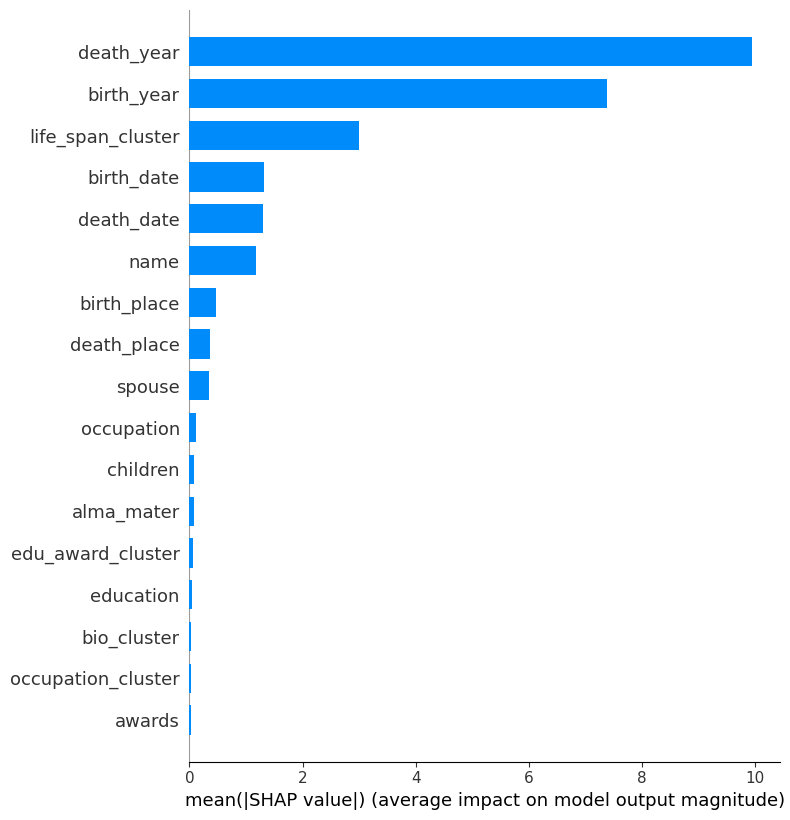

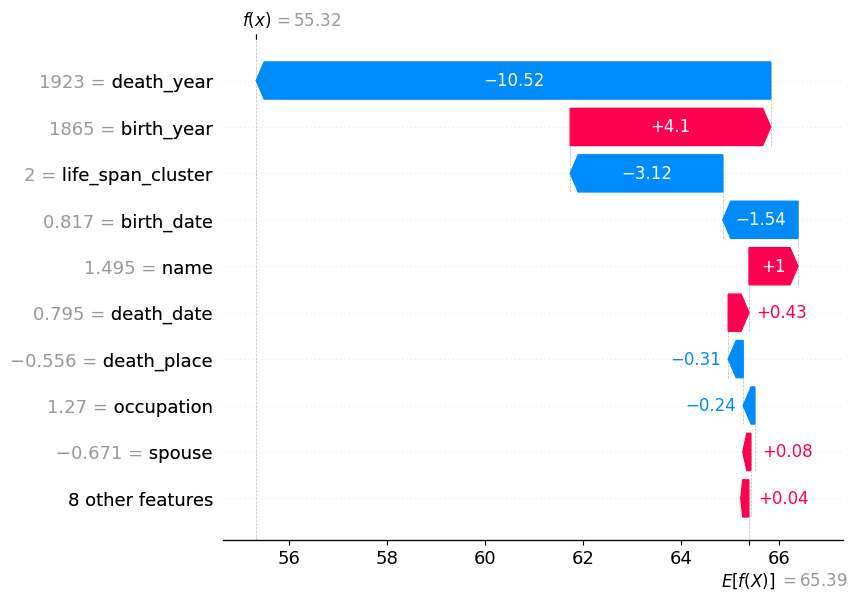

In [6]:
import shap
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# --- Ma'lumotni tayyorlash ---
X = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.2', 'life_span'])  
y = df['life_span']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Model yaratish ---
model = RandomForestRegressor(random_state=42)
model.fit(X_train, y_train)

# --- SHAP explainer ---
explainer = shap.TreeExplainer(model)
shap_values = explainer(X_test)  # Regression uchun shap_values obyekti

# --- Summary plot ---
shap.summary_plot(shap_values.values, X_test, plot_type="bar")

# --- Waterfall plot (1-sample uchun) ---
shap.plots.waterfall(shap_values[0])
plt.show()


# SHAP Analysis Xulosa 📊✨

## 1️⃣ Waterfall Plot (Bitta sample uchun) 🏞️

**Prediktsiya qiymati:** `f(x) = 55.32`

**Asosiy feature’lar ta’siri:**

- `death_year` ➖ -10.52 (prediktsiyani kamaytiradi)  
- `birth_year` ➕ +4.1 (prediktsiyani oshiradi)  
- `life_span_cluster` ➖ -3.12  
- `birth_date` ➖ -1.54  
- `name` ➕ +1  

💡 **Xulosa:**  
Bu bitta insonga ko‘ra, `death_year` va `birth_year` eng kuchli ta’sirga ega. `death_year` prediktsiyani pastga tortadi, `birth_year` esa oshiradi.

---

## 2️⃣ Summary Plot (Barcha sample’lar uchun) 📈

**Eng muhim feature’lar** (o‘rtacha SHAP value bo‘yicha):  

1. `death_year`  
2. `birth_year`  
3. `life_span_cluster`  
4. `birth_date`  
5. `death_date`  
6. `name`  

**Kamroq ta’sir qiluvchi feature’lar:**  
`occupation`, `children`, `alma_mater`, `education`, `awards` va boshqalar.

💡 **Xulosa:**  
Model ko‘proq **temporal feature’lar** (`birth_year`, `death_year`, `birth_date`) va `life_span_cluster` asosida qaror qabul qilmoqda. Shaxsiy atributlar (`occupation`, `children`, `education`) kamroq ta’sir ko‘rsatadi.

---

## 3️⃣ Umumiy xulosa 📝

- Model **yashash davomiyligi (`life_span`)**ni asosan yil ma’lumotlari va klasterlar asosida prognoz qilmoqda.  
- SHAP analysis orqali har bir feature’ning individual ta’siri aniq ko‘rinib turibdi.  
- Bu natijalar model interpretatsiyasini osonlashtiradi va **feature engineering** uchun ham foydali.
